In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/matrix-numa.csv')

cpu_df['cache_hit_rate_0'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_0']) / cpu_df['cache_hit_0']
cpu_df['cache_hit_rate_1'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_1']) / cpu_df['cache_hit_1']
cpu_df['cache_hit_rate_2'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_2']) / cpu_df['cache_hit_2']
cpu_df['cache_hit_rate_3'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_3']) / cpu_df['cache_hit_3']
cpu_df['cache_hit_rate_avg'] = (cpu_df['cache_hit_rate_0'] + cpu_df['cache_hit_rate_1'] + cpu_df['cache_hit_rate_2'] + cpu_df['cache_hit_rate_3']) / 4

cpu_df['br_miss_rate_0'] = cpu_df['br_miss_0'] / cpu_df['br_insns_0']
cpu_df['br_miss_rate_1'] = cpu_df['br_miss_1'] / cpu_df['br_insns_1']
cpu_df['br_miss_rate_2'] = cpu_df['br_miss_2'] / cpu_df['br_insns_2']
cpu_df['br_miss_rate_3'] = cpu_df['br_miss_3'] / cpu_df['br_insns_3']
cpu_df['br_miss_rate_avg'] = (cpu_df['br_miss_rate_0'] + cpu_df['br_miss_rate_1'] + cpu_df['br_miss_rate_2'] + cpu_df['br_miss_rate_3']) / 4

cpu_df['clock_speed'] = (cpu_df['insns_0'] + cpu_df['insns_1'] + cpu_df['insns_2'] + cpu_df['insns_3']) / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df = cpu_df.drop(index=0)

cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,4578,2.304,39251,18330,6812,46,1860,275,11190,900000,...,2.120550,2.120975,0.098388,1.333290,0.147849,0.134796,0.136150,0.065940,0.121184,109.910241
2,6246,2.304,73630,27602,11116,262,2812,627,28388,900000,...,0.775352,1.086231,0.157930,0.748986,0.222973,0.262384,0.176928,0.070137,0.183106,147.041367
3,8035,2.304,34782,15665,5790,50,1510,226,8894,900000,...,1.801000,1.798251,0.068046,1.164665,0.149669,0.137715,0.145540,0.090693,0.130904,108.838457
4,9835,2.084,28822,13003,4769,44,1148,166,5910,800000,...,1.483437,1.482651,0.062344,1.004802,0.144599,0.133229,0.139280,0.069638,0.121687,99.219444
5,11642,2.084,105669,39119,15852,625,4488,1009,44461,800000,...,4.943785,4.943161,0.253353,2.775218,0.224822,0.136150,0.139610,0.066749,0.141833,112.246265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,50210488,1.672,31371,14535,5271,39,1269,163,6499,900000,...,1.490770,1.490330,0.070451,1.011038,0.128448,0.132479,0.128940,0.060911,0.112694,111.104192
29986,50212160,1.672,31176,14534,5268,40,1272,162,6489,900000,...,1.490341,1.488914,0.071804,1.010867,0.127358,0.129630,0.133238,0.058436,0.112165,110.735646
29987,50213827,1.688,31203,14535,5262,42,1276,163,6458,900000,...,1.488636,1.487916,0.071092,1.009916,0.127743,0.126781,0.130372,0.061075,0.111493,110.661068
29988,50215492,1.688,31324,14534,5266,42,1275,167,6515,900000,...,1.488782,1.488200,0.065591,1.008649,0.130980,0.126781,0.128940,0.070756,0.114364,114.877477


In [4]:
cpu_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.773784
insns_0               0.617312
cache_hit_0           0.561127
cache_miss_0          0.867990
br_insns_0            0.099245
br_miss_0            -0.107008
bus_cycles_0          0.771499
freq_0                0.893709
cpu_cycles_1          0.818448
insns_1               0.735031
cache_hit_1           0.731646
cache_miss_1          0.826040
br_insns_1            0.428428
br_miss_1             0.187066
bus_cycles_1          0.818886
freq_1                0.893709
cpu_cycles_2          0.654108
insns_2               0.653000
cache_hit_2           0.662795
cache_miss_2          0.503063
br_insns_2            0.553276
br_miss_2             0.422206
bus_cycles_2          0.658100
freq_2                0.893576
cpu_cycles_3          0.484549
insns_3               0.441409
cache_hit_3           0.422024
cache_miss_3          0.475190
br_insns_3            0.297442
br_miss_3             0.114878
bus_cycles_3          0.484070
freq_3  

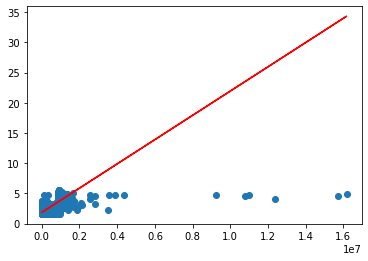

In [5]:
cpu_linear = LinearRegression()
cpu_linear.fit(cpu_df['cpu_cycles_1'].values.reshape(-1, 1),
               cpu_df['current'].values.reshape(-1, 1))

plt.scatter(cpu_df['cpu_cycles_1'].values.reshape(-1, 1),
            cpu_df['current'].values.reshape(-1, 1))
plt.plot(cpu_df['cpu_cycles_1'].values.reshape(-1, 1),
         cpu_linear.predict(cpu_df['cpu_cycles_1'].values.reshape(-1, 1)),
         color='red')

In [23]:
#filtering out outliers to better see patterns in cpu_cycles

# calculate IQR for column A
Q1 = cpu_df['cpu_cycles_1'].quantile(0.25)
Q3 = cpu_df['cpu_cycles_1'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = cpu_df[(cpu_df['cpu_cycles_1'] < Q1 - threshold * IQR) | (cpu_df['cpu_cycles_1'] > Q3 + threshold * IQR)]

In [24]:
filtered_cpu = cpu_df.drop(outliers.index)


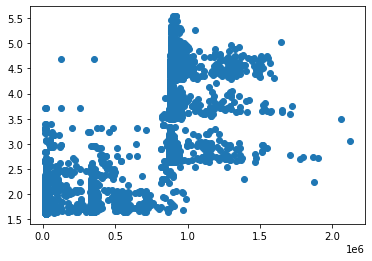

In [29]:
plt.scatter(filtered_cpu["cpu_cycles_1"].values.reshape(-1, 1),
            filtered_cpu['current'].values.reshape(-1, 1))


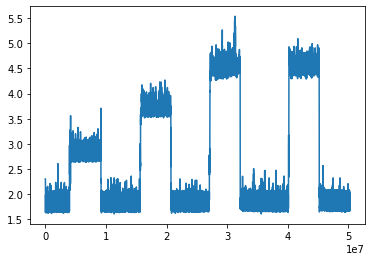

In [30]:
plt.plot(cpu_df["time"].values.reshape(-1, 1),
            cpu_df['current'].values.reshape(-1, 1))


In [50]:
from sklearn.model_selection import train_test_split

df_X = cpu_df.drop(columns=['current'])
df_Y = cpu_df['current'].astype(int)
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, random_state=42, test_size=0.2)


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_dev, y_dev)
rf.score(X_test, y_test)

0.9224730466145855

In [56]:
feature_names = df_X.columns
feature_imps = zip(feature_names, rf_mem.feature_importances_)
feature_imps=sorted(list(feature_imps), key=lambda x: x[1], reverse=True)
feature_imps

[('freq_1', 0.10668808050250482),
 ('freq_1_norm', 0.1004019323464462),
 ('freq_2', 0.09716643200805429),
 ('cache_miss_1', 0.08541050039233687),
 ('bus_cycles_1', 0.06160324894517018),
 ('insns_1', 0.061175362953879465),
 ('freq_3', 0.0608864878199367),
 ('cpu_cycles_1', 0.05300544821306013),
 ('freq_0', 0.05278270128504186),
 ('cache_hit_1', 0.045500144022372346),
 ('clock_speed_norm', 0.036061509944441836),
 ('cache_hit_rate_3', 0.020497717574266855),
 ('cpu_cycles_3', 0.014792154127464683),
 ('bus_cycles_3', 0.013309580472086486),
 ('cache_hit_rate_1', 0.008931322207958926),
 ('clock_speed', 0.008764795144157811),
 ('bus_cycles_2', 0.008730421443565306),
 ('br_miss_rate_1', 0.008683794466403156),
 ('br_miss_1', 0.008652663460649223),
 ('cache_miss_3', 0.008342415700332671),
 ('insns_3', 0.008038426618199278),
 ('cache_hit_3', 0.0058823885991098855),
 ('time', 0.003835723885602339),
 ('cache_hit_2', 0.0023612603983308024),
 ('br_miss_3', 0.001262798634812281),
 ('br_miss_rate_3', 0.

<AxesSubplot:xlabel='time'>

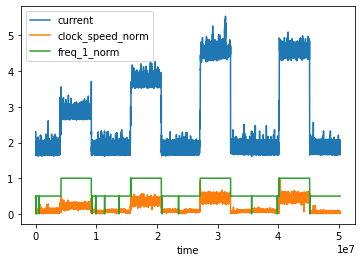

In [57]:
cpu_df['clock_speed_norm'] = min_max_scaling(cpu_df['clock_speed'])
cpu_df['freq_1_norm'] = min_max_scaling(cpu_df['freq_1'])

cpu_df.plot(x='time', y=['current', 'clock_speed_norm', 'freq_1_norm'])

In [58]:
mem_df = pd.read_csv('../results/mem-numa.csv')

mem_df['cache_hit_rate_0'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_0']) / mem_df['cache_hit_0']
mem_df['cache_hit_rate_1'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_1']) / mem_df['cache_hit_1']
mem_df['cache_hit_rate_2'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_2']) / mem_df['cache_hit_2']
mem_df['cache_hit_rate_3'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_3']) / mem_df['cache_hit_3']
mem_df['cache_hit_rate_avg'] = (mem_df['cache_hit_rate_0'] + mem_df['cache_hit_rate_1'] + mem_df['cache_hit_rate_2'] + mem_df['cache_hit_rate_3']) / 4

mem_df['br_miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['br_miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['br_miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['br_miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['br_miss_rate_avg'] = (mem_df['br_miss_rate_0'] + mem_df['br_miss_rate_1'] + mem_df['br_miss_rate_2'] + mem_df['br_miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())
mem_df = mem_df.drop(index=0)

mem_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,205393,1.200,580872,375486,146089,2146,83058,4164,286145,600000,...,41.432908,41.446935,1.220947,21.271525,0.050134,0.135021,0.134561,0.255589,0.143826,6.666416
2,307686,1.252,506424,342104,131755,1863,78656,3404,249020,600000,...,37.926576,37.380250,2.262329,19.638754,0.043277,0.124457,0.131728,0.248202,0.136916,4.908352
3,410002,1.196,581977,374679,144320,2415,82320,4669,286713,600000,...,17.244944,40.945800,5.778712,16.238181,0.056718,0.268827,0.131728,0.219072,0.169086,4.592214
4,512236,1.200,604266,386294,150581,2315,84081,4660,297951,600000,...,42.743896,42.770739,6.578795,23.269514,0.055423,0.128205,0.128205,0.225564,0.134349,4.533179
5,614508,1.200,549676,363179,140431,2188,80682,4273,270651,600000,...,40.506347,40.404029,9.629268,22.881016,0.052961,0.125184,0.127219,0.200318,0.126421,4.108260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,16176106,1.204,564624,371632,143920,2134,81864,4506,278128,600000,...,41.368603,40.832293,40.808565,30.998658,0.055043,0.127168,0.133144,0.131728,0.111771,3.938032
136,16278370,1.200,542725,362460,140225,1969,80699,4303,267179,600000,...,40.353195,40.298362,18.767015,25.101133,0.053322,0.124269,0.127941,0.174356,0.119972,3.930249
137,16380633,1.200,585103,382324,148131,2259,82482,4967,288306,600000,...,42.665802,42.015319,42.026390,31.923065,0.060219,0.123010,0.127298,0.130312,0.110210,4.042635
138,16482892,1.200,543770,360861,139920,2006,80178,4104,267664,600000,...,40.346986,39.685674,8.511252,22.382394,0.051186,0.124457,0.128895,0.195004,0.124886,4.121799


In [59]:
mem_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.315226
insns_0               0.181948
cache_hit_0           0.180801
cache_miss_0          0.212801
br_insns_0            0.184503
br_miss_0             0.212298
bus_cycles_0          0.315093
freq_0                0.961324
cpu_cycles_1          0.944457
insns_1               0.879227
cache_hit_1           0.921120
cache_miss_1          0.752031
br_insns_1            0.845494
br_miss_1             0.796072
bus_cycles_1          0.944457
freq_1                0.961324
cpu_cycles_2          0.508517
insns_2               0.499101
cache_hit_2           0.498005
cache_miss_2          0.496816
br_insns_2            0.499016
br_miss_2             0.493813
bus_cycles_2          0.508476
freq_2                0.961324
cpu_cycles_3          0.513633
insns_3               0.478125
cache_hit_3           0.475390
cache_miss_3          0.514436
br_insns_3            0.488036
br_miss_3             0.565082
bus_cycles_3          0.513636
freq_3  

In [60]:
mem_df['current_predict'] = cpu_linear.predict(mem_df['clock_speed'].values.reshape(-1, 1)).reshape(1, -1)[0]
mem_df['current_diff'] = mem_df['current'] - mem_df['current_predict']
mem_df.drop('time', axis=1).corr()['current_diff']

current               1.000000
cpu_cycles_0          0.315336
insns_0               0.182019
cache_hit_0           0.180871
cache_miss_0          0.212928
br_insns_0            0.184578
br_miss_0             0.212413
bus_cycles_0          0.315203
freq_0                0.961316
cpu_cycles_1          0.944389
insns_1               0.879076
cache_hit_1           0.921002
cache_miss_1          0.752013
br_insns_1            0.845321
br_miss_1             0.796155
bus_cycles_1          0.944389
freq_1                0.961316
cpu_cycles_2          0.508373
insns_2               0.498952
cache_hit_2           0.497857
cache_miss_2          0.496692
br_insns_2            0.498868
br_miss_2             0.493677
bus_cycles_2          0.508331
freq_2                0.961316
cpu_cycles_3          0.513733
insns_3               0.478227
cache_hit_3           0.475493
cache_miss_3          0.514545
br_insns_3            0.488137
br_miss_3             0.565189
bus_cycles_3          0.513736
freq_3  

<AxesSubplot:xlabel='time'>

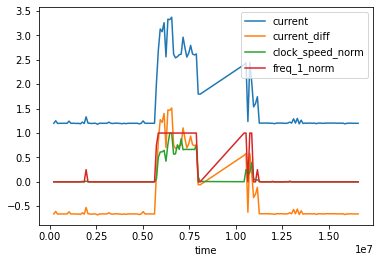

In [61]:
mem_df['clock_speed_norm'] = min_max_scaling(mem_df['clock_speed'])
mem_df['freq_1_norm'] = min_max_scaling(mem_df['freq_1'])

mem_df.plot(x='time', y=['current', 'current_diff', 'clock_speed_norm', 'freq_1_norm'])

In [62]:
from sklearn.model_selection import train_test_split

mem_df_X = mem_df.drop(columns=['current'])
mem_df_Y = mem_df['current'].astype(int)
X_dev, X_test, y_dev, y_test = train_test_split(mem_df_X, mem_df_Y, random_state=42, test_size=0.2)


In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_mem = RandomForestRegressor(random_state=42)
rf_mem.fit(X_dev, y_dev)
rf_mem.score(X_test, y_test)

0.921612962962963

In [64]:
feature_names = mem_df_X.columns
feature_imps = zip(feature_names, rf_mem.feature_importances_)
feature_imps=sorted(list(feature_imps), key=lambda x: x[1], reverse=True)
feature_imps

[('freq_1', 0.10668808050250482),
 ('current_diff', 0.1004019323464462),
 ('freq_2', 0.09716643200805429),
 ('freq_1_norm', 0.09633594783226536),
 ('cache_miss_1', 0.08541050039233687),
 ('bus_cycles_1', 0.06160324894517018),
 ('insns_1', 0.061175362953879465),
 ('freq_3', 0.0608864878199367),
 ('cpu_cycles_1', 0.05300544821306013),
 ('freq_0', 0.05278270128504186),
 ('cache_hit_1', 0.045500144022372346),
 ('current_predict', 0.036061509944441836),
 ('cache_hit_rate_3', 0.020497717574266855),
 ('clock_speed_norm', 0.01748455415254325),
 ('cpu_cycles_3', 0.014792154127464683),
 ('bus_cycles_3', 0.013309580472086486),
 ('cache_hit_rate_1', 0.008931322207958926),
 ('clock_speed', 0.008764795144157811),
 ('bus_cycles_2', 0.008730421443565306),
 ('br_miss_rate_1', 0.008683794466403156),
 ('br_miss_1', 0.008652663460649223),
 ('cache_miss_3', 0.008342415700332671),
 ('insns_3', 0.008038426618199278),
 ('cache_hit_3', 0.0058823885991098855),
 ('time', 0.003835723885602339),
 ('cache_hit_2', 0